# Model Regularization in Practice, an example with Keras and TensorFlow 2.0

This is a notebook for the medium article [Model Regularization in Practice, an example with Keras and TensorFlow 2.0](https://medium.com/@bindiatwork/machine-learning-model-regularization-in-practice-an-example-with-keras-and-tensorflow-2-0-52a96746123e)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

## Exploring data

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preparing data for Keras and TensorFlow

In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [7]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


## 1. Build an unregularized neural network model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

### Compile the model


In [11]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

### Fit the model to the training data

In [12]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Train on 90 samples, validate on 30 samples
Epoch 1/200
90/90 - 2s - loss: 1.0775 - accuracy: 0.3222 - val_loss: 0.9958 - val_accuracy: 0.6667
Epoch 2/200
90/90 - 0s - loss: 0.9462 - accuracy: 0.6000 - val_loss: 0.9218 - val_accuracy: 0.7000
Epoch 3/200
90/90 - 0s - loss: 0.8496 - accuracy: 0.7222 - val_loss: 0.8284 - val_accuracy: 0.7000
Epoch 4/200
90/90 - 0s - loss: 0.7527 - accuracy: 0.7222 - val_loss: 0.7359 - val_accuracy: 0.7000
Epoch 5/200
90/90 - 0s - loss: 0.6553 - accuracy: 0.7222 - val_loss: 0.6163 - val_accuracy: 0.7000
Epoch 6/200
90/90 - 0s - loss: 0.5543 - accuracy: 0.7222 - val_loss: 0.4839 - val_accuracy: 0.7667
Epoch 7/200
90/90 - 0s - loss: 0.4597 - accuracy: 0.8222 - val_loss: 0.4057 - val_accuracy: 0.7667
Epoch 8/200
90/90 - 0s - loss: 0.3637 - accuracy: 0.8444 - val_loss: 0.2993 - val_accuracy: 0.9333
Epoch 9/200
90/90 - 0s - loss: 0.3643 - accuracy: 0.8667 - val_loss: 0.3006 - val_accuracy: 0.8000
Epoch 10/200
90/90 - 0s - loss: 0.3177 - accuracy: 0.8333 - val_l

### Model Evaluation

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

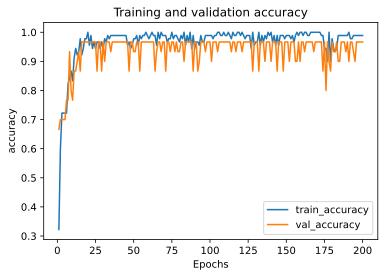

In [14]:
plot_metric(history, 'accuracy')

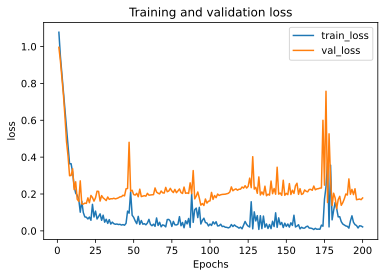

In [15]:
plot_metric(history, 'loss')

Plot the training and validation loss

Finally, let's plot the loss vs. epochs graph on the training and validation sets

From the graph, we can see that the model has vastly overfit the training data, so it outperform the validation set


In [48]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

30/1 - 0s - loss: 0.0065 - accuracy: 1.0000


[0.006538852117955685, 1.0]

## 2. Adding L2 regularization and Dropout

In [49]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [50]:
# Re-build the model with weight decay and dropout layers
model = create_regularized_model(1e-5, 0.3)

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                320       
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)              

In [52]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [53]:
# Train the model, with some of the data reserved for validation
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Train on 90 samples, validate on 30 samples
Epoch 1/200
90/90 - 2s - loss: 1.1669 - accuracy: 0.2889 - val_loss: 1.0968 - val_accuracy: 0.1667
Epoch 2/200
90/90 - 0s - loss: 1.1816 - accuracy: 0.3333 - val_loss: 1.1025 - val_accuracy: 0.2667
Epoch 3/200
90/90 - 0s - loss: 1.1114 - accuracy: 0.3444 - val_loss: 1.1015 - val_accuracy: 0.3000
Epoch 4/200
90/90 - 0s - loss: 1.1042 - accuracy: 0.4556 - val_loss: 1.0955 - val_accuracy: 0.3000
Epoch 5/200
90/90 - 0s - loss: 1.0818 - accuracy: 0.4111 - val_loss: 1.0899 - val_accuracy: 0.3000
Epoch 6/200
90/90 - 0s - loss: 1.1030 - accuracy: 0.3778 - val_loss: 1.0884 - val_accuracy: 0.3000
Epoch 7/200
90/90 - 0s - loss: 1.0747 - accuracy: 0.4444 - val_loss: 1.0866 - val_accuracy: 0.3000
Epoch 8/200
90/90 - 0s - loss: 1.0649 - accuracy: 0.4333 - val_loss: 1.0841 - val_accuracy: 0.3000
Epoch 9/200
90/90 - 0s - loss: 1.0647 - accuracy: 0.3778 - val_loss: 1.0800 - val_accuracy: 0.3000
Epoch 10/200
90/90 - 0s - loss: 1.0962 - accuracy: 0.3333 - val_l

### Plot the learning curves

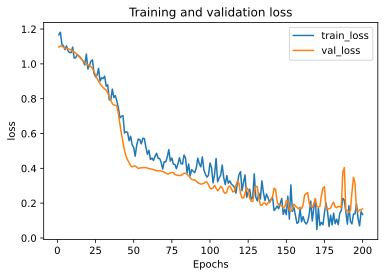

In [54]:
plot_metric(history, 'loss')

Here, you can see that the overfitting is not completely fixed, but there is a signficant improvement when we compare it to the unregularized model

In [55]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

30/1 - 0s - loss: 0.0602 - accuracy: 0.9667


[0.06016349419951439, 0.96666664]

## That's it

Thanks for reading

This is a notebook for the medium article [Model Regularization in Practice, an example with Keras and TensorFlow 2.0](https://medium.com/@bindiatwork/machine-learning-model-regularization-in-practice-an-example-with-keras-and-tensorflow-2-0-52a96746123e)

Please check out article for instructions